# Proyecto 1 Regresion de Codigo
## Universidad Galileo
## Ciencia de Datos en Python
## Seccion V
## Pablo Daniel Passarelli López
## 17001393

### Imports de librerias

In [258]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

### Carga de datos

In [259]:
data=np.load('/Users/ppassarelli/Desktop/Galileo/Maestria/Ciencia_de_Datos_en_Python/Proyecto/proyecto_data/proyecto_training_data.npy', encoding='ASCII')
data.dtype

dtype('float64')

## Limpieza de datos

### obtenemos informacion de las columnas que tienen datos que no se pueden procesar como NaN o undefined

In [260]:
columnas_con_nan = np.isnan(data).any(axis=0)
porcentaje_nan_por_columna = (np.sum(np.isnan(data[:, columnas_con_nan]), axis=0) / len(data)) * 100
columnas_con_nan

array([False, False, False, False, False,  True])

### Como el porcentaje de NaNs es menor al 20% procedemos a imputar los valores con la media

In [261]:
media_nan = np.nanmean(data[:,-1])
data=np.nan_to_num(data, nan=media_nan)


## Separacion de la data en train, validate y test

In [262]:
train, validate, test = np.split(data, [int(len(data)*0.8), int(len(data)*0.9)])
train

array([[2.0850e+05, 7.0000e+00, 8.5600e+02, 8.0000e+00, 2.0030e+03,
        6.5000e+01],
       [1.8150e+05, 6.0000e+00, 1.2620e+03, 6.0000e+00, 1.9760e+03,
        8.0000e+01],
       [2.2350e+05, 7.0000e+00, 9.2000e+02, 6.0000e+00, 2.0010e+03,
        6.8000e+01],
       ...,
       [2.3317e+05, 7.0000e+00, 1.5020e+03, 7.0000e+00, 2.0090e+03,
        7.9000e+01],
       [2.4535e+05, 8.0000e+00, 1.6940e+03, 7.0000e+00, 2.0080e+03,
        6.4000e+01],
       [1.7300e+05, 6.0000e+00, 9.5900e+02, 7.0000e+00, 2.0000e+03,
        5.8000e+01]])

In [263]:
train

array([[2.0850e+05, 7.0000e+00, 8.5600e+02, 8.0000e+00, 2.0030e+03,
        6.5000e+01],
       [1.8150e+05, 6.0000e+00, 1.2620e+03, 6.0000e+00, 1.9760e+03,
        8.0000e+01],
       [2.2350e+05, 7.0000e+00, 9.2000e+02, 6.0000e+00, 2.0010e+03,
        6.8000e+01],
       ...,
       [2.3317e+05, 7.0000e+00, 1.5020e+03, 7.0000e+00, 2.0090e+03,
        7.9000e+01],
       [2.4535e+05, 8.0000e+00, 1.6940e+03, 7.0000e+00, 2.0080e+03,
        6.4000e+01],
       [1.7300e+05, 6.0000e+00, 9.5900e+02, 7.0000e+00, 2.0000e+03,
        5.8000e+01]])

## Analisis exploratorio:

1. Media
2. Valor Maximo
3. Valor Minimo
4. Rango
5. Desviacion Estandar

In [264]:
media=np.mean(train, axis=0)
maximo=np.amax(train, axis=0)
minimo=np.amin(train, axis=0)
rango=np.ptp(train, axis=0)
print('Media: ', media)
print('Maximo: ', maximo)
print('Minimo: ', minimo)
print('Rango: ',rango)

Media:  [1.80590277e+05 6.10102740e+00 1.15632363e+03 6.48544521e+00
 1.97145120e+03 6.99651468e+01]
Maximo:  [7.550e+05 1.000e+01 3.228e+03 1.400e+01 2.010e+03 3.130e+02]
Minimo:  [3.490e+04 1.000e+00 3.340e+02 2.000e+00 1.875e+03 2.100e+01]
Rango:  [7.201e+05 9.000e+00 2.894e+03 1.200e+01 1.350e+02 2.920e+02]


In [265]:
df1=pd.DataFrame(train, columns=['SalePrice', 'OverallQual','1stFlrSF','TotRmsAbvGrd','YearBuilt','LotFrontage'])

def min_max_normalize(column):
	return (column - column.min()) / (column.max() - column.min())

# Normalizar usando min-max
df1 = df1.apply(min_max_normalize)

dfValidate=pd.DataFrame(validate, columns=['SalePrice', 'OverallQual','1stFlrSF','TotRmsAbvGrd','YearBuilt','LotFrontage'])
dfValidate = dfValidate.apply(min_max_normalize)

dfTest=pd.DataFrame(test, columns=['SalePrice', 'OverallQual','1stFlrSF','TotRmsAbvGrd','YearBuilt','LotFrontage'])
dfTest = dfTest.apply(min_max_normalize)

## Graficas:

/var/folders/l7/_79ggttn35g9c9gf1rry4wjc0000gq/T/ipykernel_97863/4179949257.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['SalePrice'], kde=False)


<Axes: xlabel='SalePrice'>

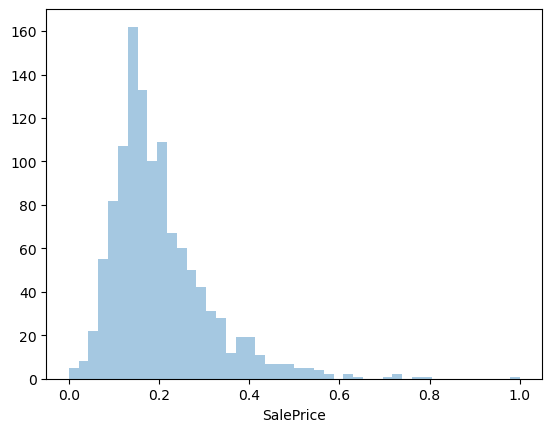

In [266]:
sns.distplot(df1['SalePrice'], kde=False)

/var/folders/l7/_79ggttn35g9c9gf1rry4wjc0000gq/T/ipykernel_97863/2446878215.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['OverallQual'], kde=False)


<Axes: xlabel='OverallQual'>

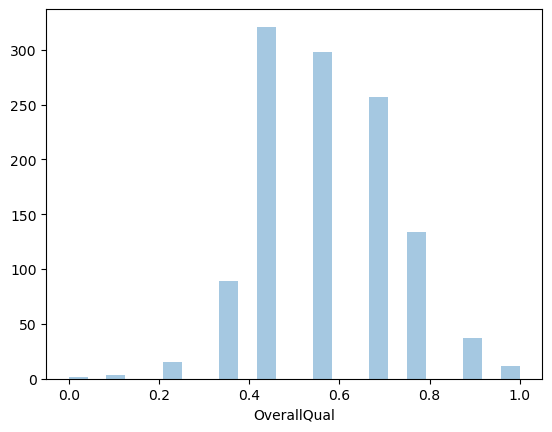

In [267]:
sns.distplot(df1['OverallQual'], kde=False)

/var/folders/l7/_79ggttn35g9c9gf1rry4wjc0000gq/T/ipykernel_97863/480497543.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['1stFlrSF'], kde=False)


<Axes: xlabel='1stFlrSF'>

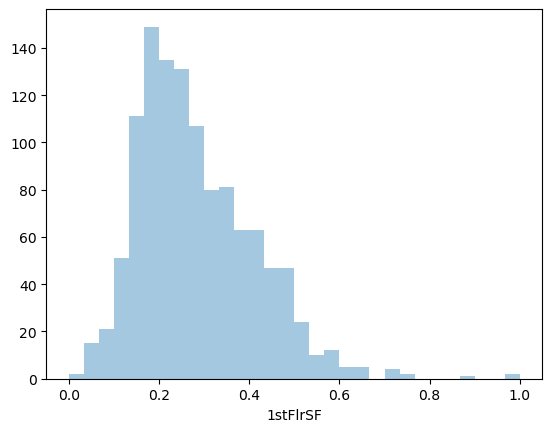

In [268]:
sns.distplot(df1['1stFlrSF'], kde=False)

/var/folders/l7/_79ggttn35g9c9gf1rry4wjc0000gq/T/ipykernel_97863/1050585327.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['TotRmsAbvGrd'], kde=False)


<Axes: xlabel='TotRmsAbvGrd'>

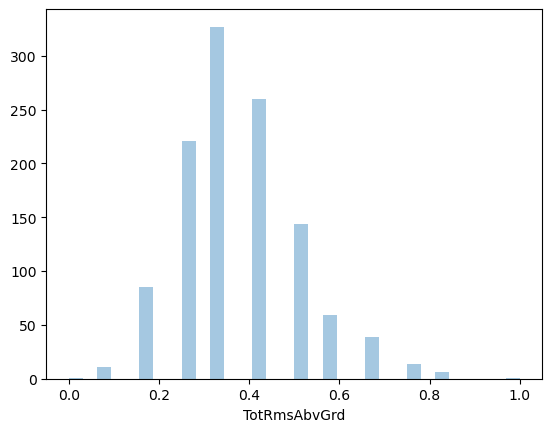

In [269]:
sns.distplot(df1['TotRmsAbvGrd'], kde=False)

/var/folders/l7/_79ggttn35g9c9gf1rry4wjc0000gq/T/ipykernel_97863/3476031787.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['YearBuilt'], kde=False)


<Axes: xlabel='YearBuilt'>

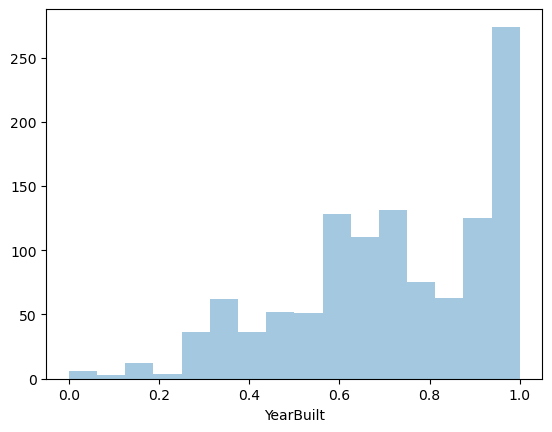

In [270]:
sns.distplot(df1['YearBuilt'], kde=False)

/var/folders/l7/_79ggttn35g9c9gf1rry4wjc0000gq/T/ipykernel_97863/2031914862.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['LotFrontage'], kde=False)


<Axes: xlabel='LotFrontage'>

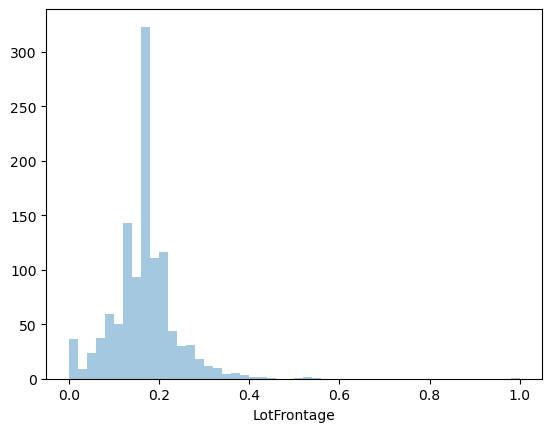

In [271]:
sns.distplot(df1['LotFrontage'], kde=False)

## Analisis de Correlacion

### Calidad general VS Precio de Venta

In [272]:
correlacion=np.corrcoef(df1['OverallQual'],df1['SalePrice'])
correlacion

array([[1.        , 0.79399005],
       [0.79399005, 1.        ]])

Text(0.5, 1.0, '0.793990050462641')

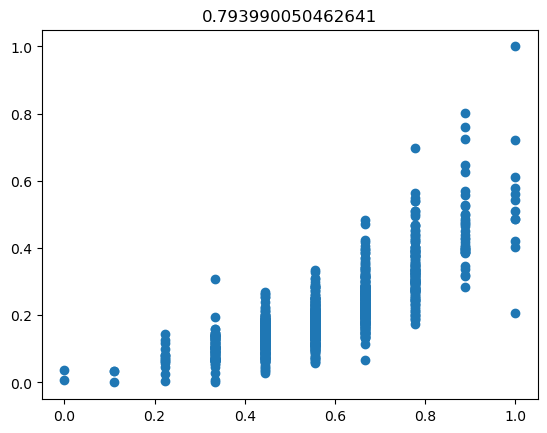

In [273]:
plt.scatter(df1['OverallQual'], df1['SalePrice'])
plt.title(correlacion[0][1])

### Pies cuadrados del primer piso vs Precio de Venta

In [274]:
correlacion=np.corrcoef(df1['1stFlrSF'],df1['SalePrice'])
correlacion

array([[1.       , 0.6162887],
       [0.6162887, 1.       ]])

Text(0.5, 1.0, '0.6162887000998716')

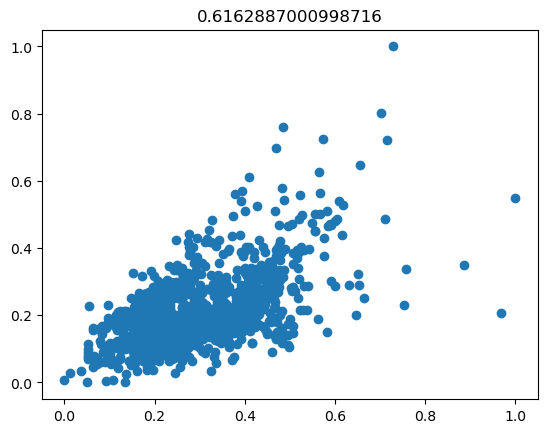

In [275]:
plt.scatter(df1['1stFlrSF'], df1['SalePrice'])
plt.title(correlacion[0][1])

### Total de habitaciones vs Precio de Venta

In [276]:
correlacion=np.corrcoef(df1['TotRmsAbvGrd'],df1['SalePrice'])
correlacion

array([[1.        , 0.56470694],
       [0.56470694, 1.        ]])

Text(0.5, 1.0, '0.5647069399593061')

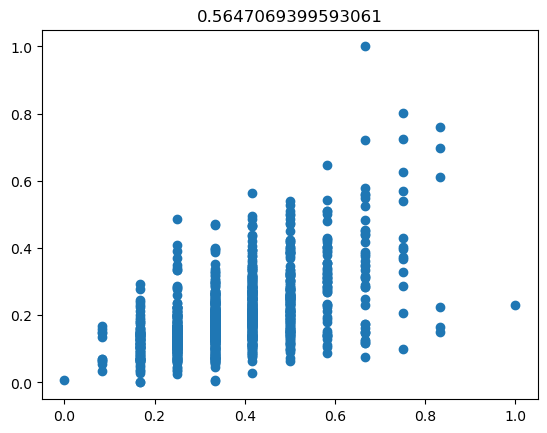

In [277]:
plt.scatter(df1['TotRmsAbvGrd'], df1['SalePrice'])
plt.title(correlacion[0][1])

### Fecha de Construccion vs Precio de Venta

In [278]:
correlacion=np.corrcoef(df1['YearBuilt'],df1['SalePrice'])
correlacion

array([[1.        , 0.53417069],
       [0.53417069, 1.        ]])

Text(0.5, 1.0, '0.5341706927117513')

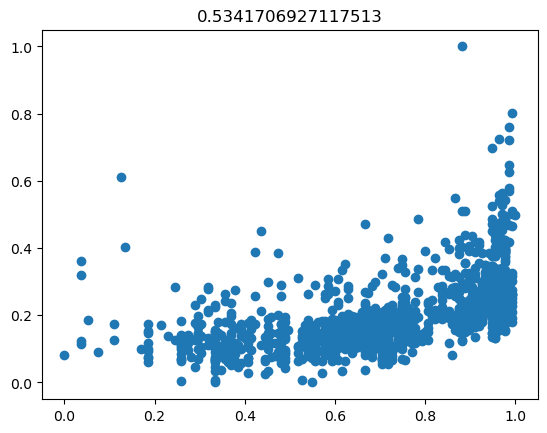

In [279]:
plt.scatter(df1['YearBuilt'], df1['SalePrice'])
plt.title(correlacion[0][1])

### Pies lineales de calle vs Precio de Venta

In [280]:
correlacion=np.corrcoef(df1['LotFrontage'],df1['SalePrice'])
correlacion

array([[1.        , 0.34853847],
       [0.34853847, 1.        ]])

Text(0.5, 1.0, '0.3485384688906941')

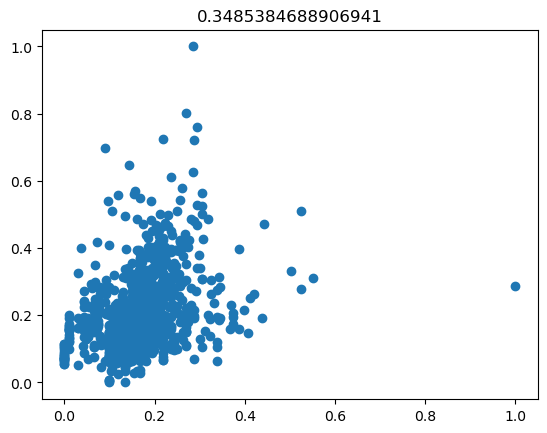

In [281]:
plt.scatter(df1['LotFrontage'], df1['SalePrice'])
plt.title(correlacion[0][1])

### Analisis:

Basado en las graficas y coeficientes de correlacion seleccionamos las variables OverallQual y 1stFlrSF porque son las que tienen mayor potencial predictivo

## Modelo y Prediccion

### Modelo

In [282]:
class modeloLineal:
	def __init__(self) -> None:
		pass

	def calcular_error(self, y, prediccion):
		vectores = (y - prediccion) ** 2
		error = (1/(2*len(y))) * np.sum(vectores)

		return error

	def calcular_gradiente(self, x, y, prediccion):
			gradiente = np.array([])
			gradiente=np.append(gradiente, ((1/len(y)) * np.sum((prediccion - y) * x)))
			gradiente=np.append(gradiente, (1/ len(y)) * np.sum((prediccion - y)))

			return gradiente


	def entrenar(self, x, y, epochs, imprimir_error_cada, escalar):
		x= np.array(x)
		y=np.array(y)
		errores=np.array([])
		gradiente=np.array([0,0])
		vector_unos = np.ones_like(x)
		matriz = np.column_stack((x, vector_unos))
		entrenamiento = {}

		betas = np.array([0.4, 0.4])

		for i in range(epochs):
			prediccion = np.dot(matriz, betas)
			error= self.calcular_error(y, prediccion)
			errores=np.append(errores, error)

			gradiente = self.calcular_gradiente(x, y, prediccion)

			betas = betas - (escalar*gradiente)

			if (i%imprimir_error_cada==0):
				print('Error: ', error)

			entrenamiento[i] = {
				'x': x,
				'prediccion': prediccion,
				'betas': betas,
				'error': error,
				'errores': errores,
				'gradientes': gradiente,
			}

		return entrenamiento, errores

entrenamiento_Overall, errores_Overall=modeloLineal().entrenar(df1['OverallQual'], df1['SalePrice'], 39, 2, 0.01)

Error:  0.09259530567470016
Error:  0.08796655189647773
Error:  0.08357859484707399
Error:  0.07941890512718783
Error:  0.07547560528285192
Error:  0.07173743588259857
Error:  0.06819372335974071
Error:  0.06483434952792376
Error:  0.061649722682882144
Error:  0.05863075020786541
Error:  0.05576881260449311
Error:  0.053055738874868606
Error:  0.05048378318464143
Error:  0.04804560274036665
Error:  0.0457342368179766
Error:  0.04354308688246989
Error:  0.04146589774203731
Error:  0.039496739682799806
Error:  0.03762999153313424
Error:  0.035860324609217176


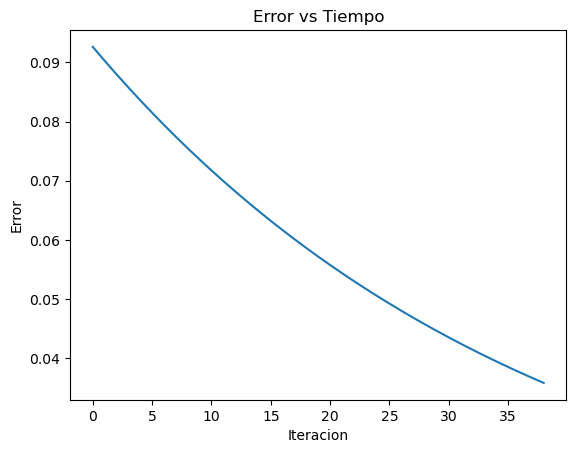

In [283]:
def graf_error(errores):
	plt.plot(errores)
	plt.xlabel('Iteracion')
	plt.ylabel('Error')
	plt.title('Error vs Tiempo')

graf_error(errores_Overall)

In [284]:
entrenamiento_1stFlrSF, errores_1stFlrSF=modeloLineal().entrenar(df1['1stFlrSF'], df1['SalePrice'], 39, 2, 0.01)

Error:  0.052302339884963134
Error:  0.05024793633557876
Error:  0.0482810058488274
Error:  0.04639782358760293
Error:  0.0445948233285662
Error:  0.042868590707936284
Error:  0.04121585675489436
Error:  0.039633491700353025
Error:  0.0381184990493651
Error:  0.036668009905945556
Error:  0.03527927753955814
Error:  0.03394967218297573
Error:  0.03267667605166218
Error:  0.03145787857524249
Error:  0.03029097183203006
Error:  0.02917374617796428
Error:  0.02810408606167989
Error:  0.027079966017782214
Error:  0.02609944683073966
Error:  0.025160671862128264


### Grafica de Error

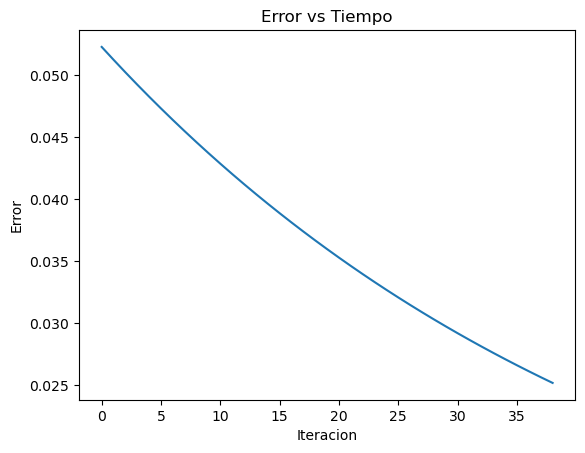

In [285]:
graf_error(errores_1stFlrSF)

### Grafica de entrenamiento

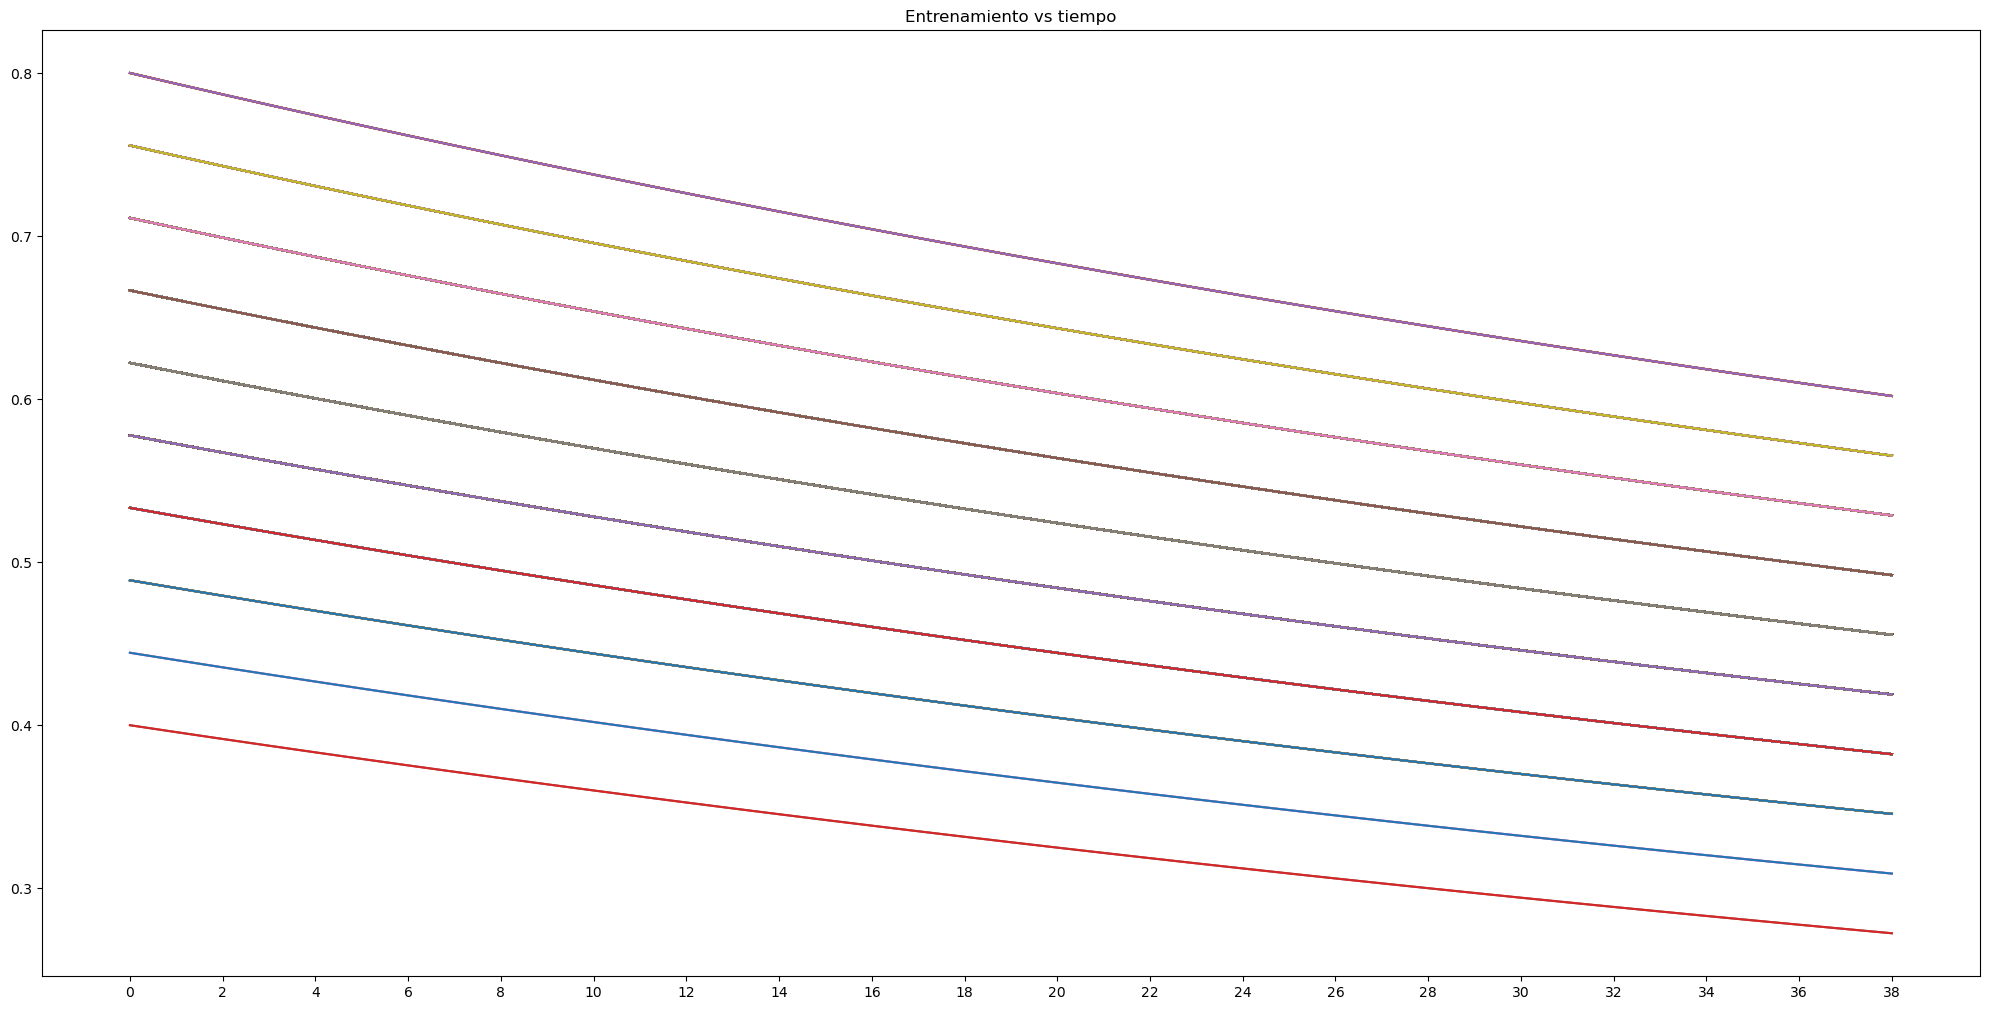

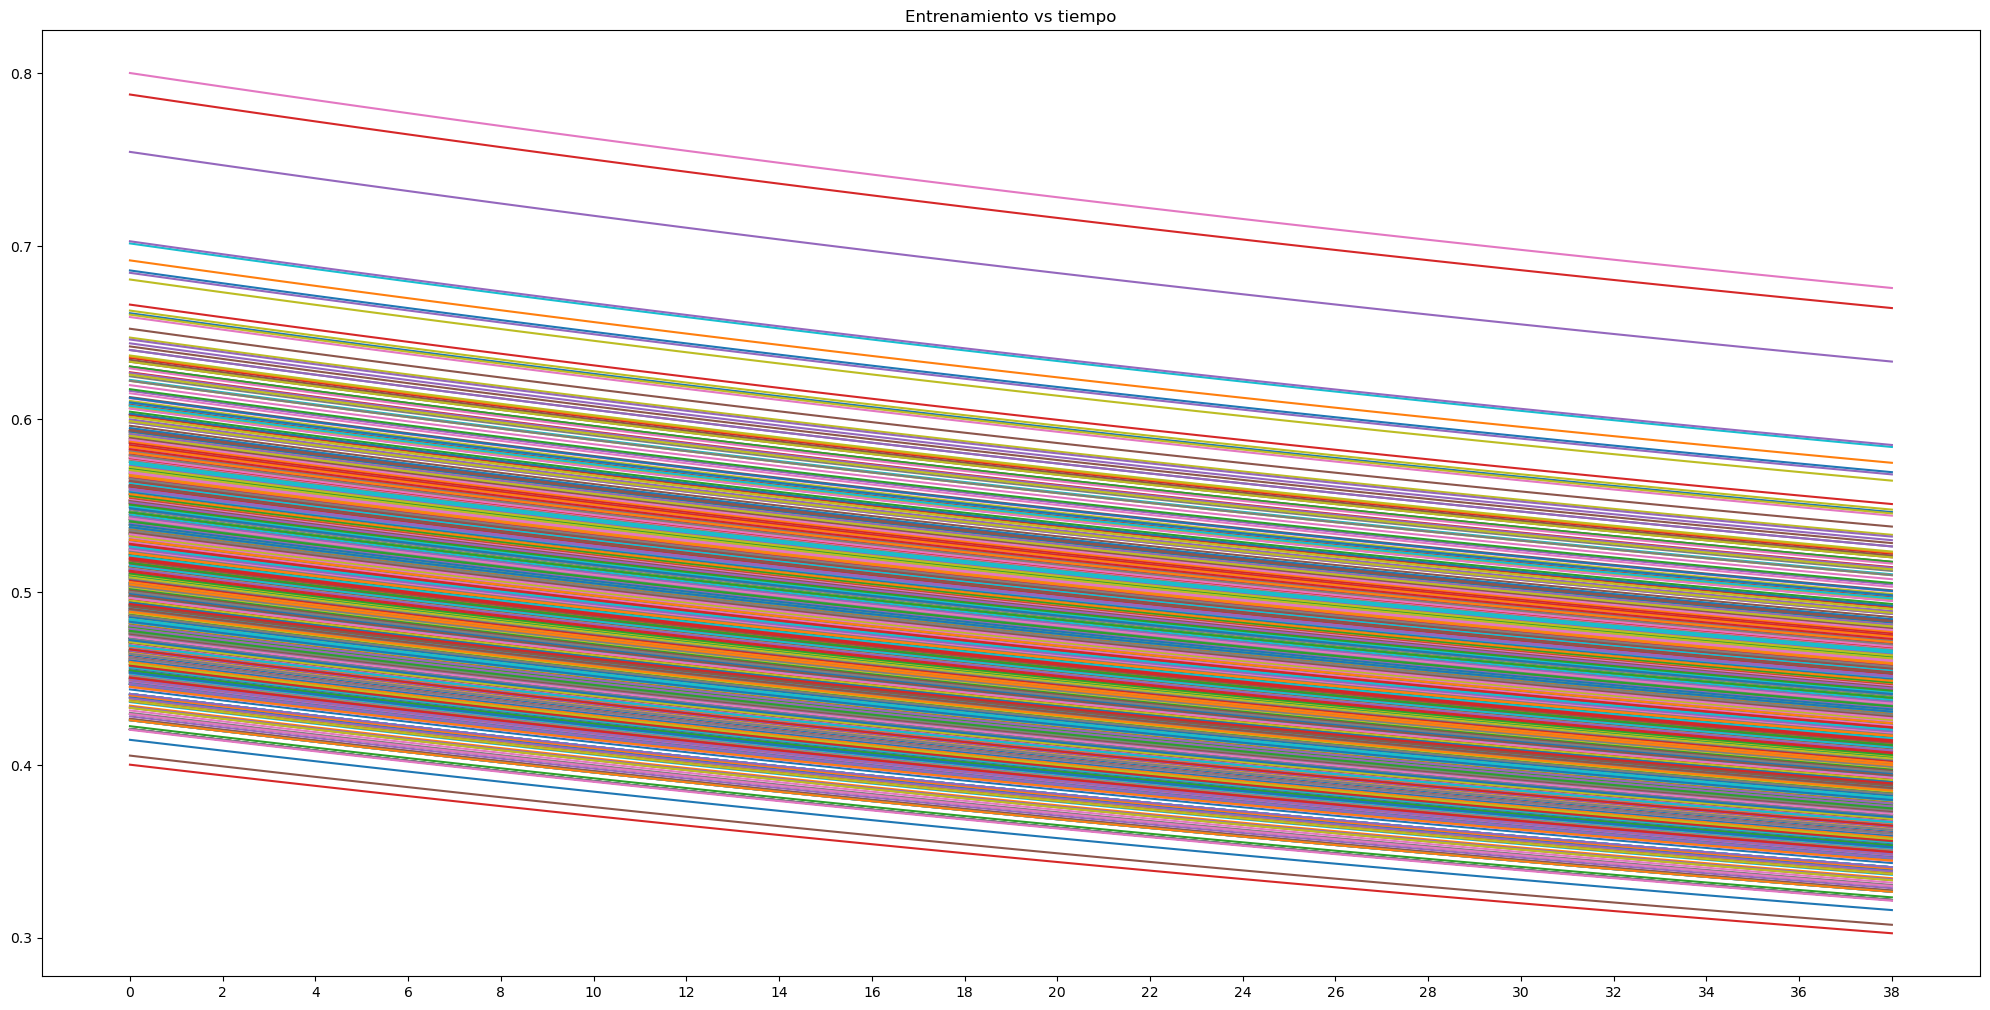

In [286]:
def graf_entrenamiento(entrenamiento, n):
	plt.figure(figsize=(20, 10))
	plt.xticks(np.arange(0, len(entrenamiento), step=n))
	plt.plot([entrenamiento[x]['prediccion'] for x in entrenamiento])
	plt.tight_layout()
	plt.title("Entrenamiento vs tiempo")
	plt.show()

graf_entrenamiento(entrenamiento_Overall, 2)
graf_entrenamiento(entrenamiento_1stFlrSF,2)

### Modelo Sklearn

In [287]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [288]:
vector_unos = np.ones_like(df1['OverallQual'])
matriz = np.column_stack((df1['OverallQual'], vector_unos))

reg = LinearRegression().fit(matriz, df1['SalePrice'])
puntaje = reg.score(matriz, df1['SalePrice'])
prediccion = reg.predict(matriz)

print(puntaje)


0.6304202002336672


In [289]:
vector_unos = np.ones_like(df1['1stFlrSF'])
matriz = np.column_stack((df1['1stFlrSF'], vector_unos))

reg = LinearRegression().fit(matriz, df1['SalePrice'])
puntaje = reg.score(matriz, df1['SalePrice'])
reg.predict(np.array([[3, 5]]))

print(puntaje)

0.37981176187078936


## Comparacion de modelos

### Comparacion Overall

In [290]:
def comparar_modelos(x, y):
    vector_unos = np.ones_like(x)
    matriz = np.column_stack((x, vector_unos))
    modelo_manual, errores_manual=modeloLineal().entrenar(x, y, 34, 10, 0.01)
    modelo_scikit=LinearRegression().fit(matriz, y)
    pred_scikit= modelo_scikit.predict(matriz)
    promedio = (modelo_manual[list(modelo_manual.keys())[-1]]['prediccion'] + modelo_scikit.predict(matriz)) / 2
    mse_scikit = mean_squared_error( pred_scikit , y)
    mse_manual = mean_squared_error( modelo_manual[list(modelo_manual.keys())[-1]]['prediccion'], y )
    mse_promedio = mean_squared_error( promedio, y )
    
    print (f'Modelo pre-entrenado: {mse_scikit}, Modelo manual: {mse_manual} , Promedio: {mse_promedio}')

comparar_modelos(df1['OverallQual'], df1['SalePrice'])

Error:  0.09259530567470016
Error:  0.07173743588259857
Error:  0.05576881260449311
Error:  0.04354308688246989
Modelo pre-entrenado: 0.00442360222986037, Modelo manual: 0.08093634637925663 , Promedio: 0.023551788267209404


### Comparacion 1fstflr

In [291]:
comparar_modelos(df1['1stFlrSF'], df1['SalePrice'])

Error:  0.052302339884963134
Error:  0.042868590707936284
Error:  0.03527927753955814
Error:  0.02917374617796428
Modelo pre-entrenado: 0.007423203526967949, Modelo manual: 0.055172913418628386 , Promedio: 0.01936063099988304


### Validadion

Error:  0.08589648822368642
Error:  0.034884013643505865
Error:  0.01604185848988129
Error:  0.009069295056186965
Error:  0.08589648822368642
Error:  0.06835605117338892
Error:  0.05462046977720148
Error:  0.04386400268512517
Modelo pre-entrenado: 0.007481627015511738, Modelo manual: 0.08223472246151166 , Promedio: 0.02616990087701172


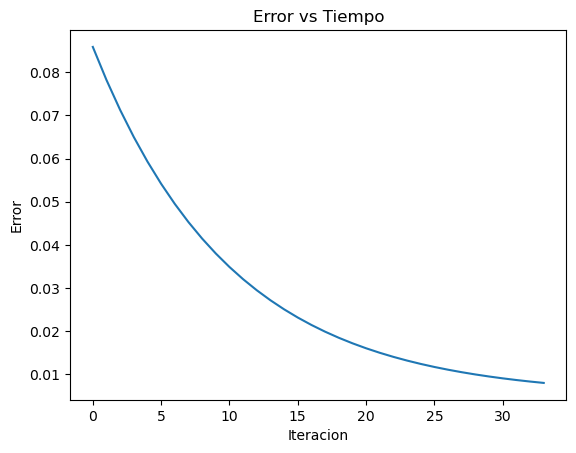

In [307]:
def validacion(x,y):
    vector_unos = np.ones_like(x)
    matriz = np.column_stack((x, vector_unos))
    validacion, errores_val= modeloLineal().entrenar(x,y, 34, 10, 0.04)
    sk_pred = LinearRegression().fit(matriz, y).predict(matriz)

    comparar_modelos(x,y)
    graf_error(errores_val)

validacion(dfValidate['OverallQual'], dfValidate['SalePrice'])

Error:  0.04595717557091423
Error:  0.023856201223675516
Error:  0.01425689495668266
Error:  0.010086527042546522
Error:  0.04595717557091423
Error:  0.03870728561587426
Error:  0.03280275402623014
Error:  0.027993895579034554
Modelo pre-entrenado: 0.013174882387911861, Modelo manual: 0.053466877294422996 , Promedio: 0.02324788111453965


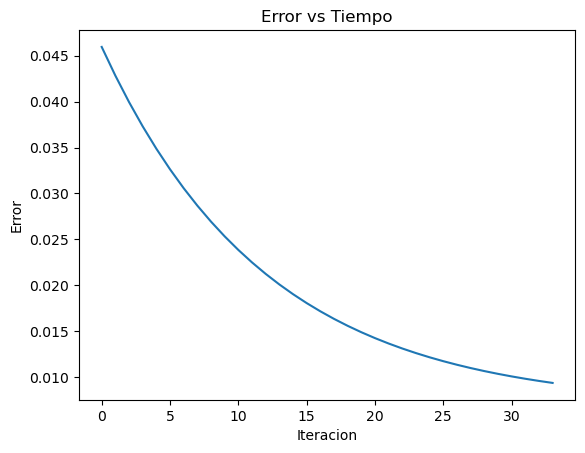

In [308]:
validacion(dfValidate['1stFlrSF'], dfValidate['SalePrice'])